<a href="https://colab.research.google.com/github/LKSfiuza/Machine-Learning-projects/blob/main/Testando_os_algoritimos_DS_e_ML_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tuning dos parâmetros

# Preparação dos dados

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
## Importando os dados de crédito
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
## Concatenar as bases de dado para realização do gridsearchCV, é necessario já quando usamos o GridSearchCV(ou qualquer técnica de Cross Validation),
## o objetivo é deixar que o próprio procedimento de k-folds faça as divisões de treino e validação dentro de um mesmo conjunto de dados

import numpy as np

X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [6]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

# Árvore de decisão

In [7]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 5, 10]}

In [8]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print('Melhores parametros: ', melhores_parametros)
print('Melhor resultado: ', melhor_resultado)



Melhores parametros:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Melhor resultado:  0.983


# Random Forest

In [9]:
parametros_rf = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 5, 10]}

In [10]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid = parametros_rf)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print('Melhores parametros: ', melhores_parametros)
print('Melhor resultado: ', melhor_resultado)

Melhores parametros:  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor resultado:  0.9870000000000001


# KNN

In [11]:
parametros_knn = {'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]}

In [12]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = parametros_knn)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print('Melhores parametros: ', melhores_parametros)
print('Melhor resultado: ', melhor_resultado)

Melhores parametros:  {'n_neighbors': 20, 'p': 1}
Melhor resultado:  0.9800000000000001


# Regressão logística

In [13]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
parametros_lr = {'C': [1.0, 1.5, 2.0],
                 'tol': [000.1, 0000.1, 00000.1],
                 'solver' : ['lbfgs', 'sag', 'saga']}


In [15]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid = parametros_lr)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print('Melhores parametros: ', melhores_parametros)
print('Melhor resultado: ', melhor_resultado)

Melhores parametros:  {'C': 2.0, 'solver': 'saga', 'tol': 0.1}
Melhor resultado:  0.9484999999999999


# SVM

In [16]:
parametros_svm = {'C': [1.0, 1.5, 2.0],
                 'tol': [000.1, 0000.1, 00000.1],
                 'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']}

In [17]:
grid_search = GridSearchCV(estimator=SVC(), param_grid = parametros_svm)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print('Melhores parametros: ', melhores_parametros)
print('Melhor resultado: ', melhor_resultado)

Melhores parametros:  {'C': 2.0, 'kernel': 'rbf', 'tol': 0.1}
Melhor resultado:  0.983


# RNA

In [18]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
parametros_rna = {'activation': ['relu', 'logistic', 'tahn'],
                  'batch_size': [10, 56],
                  'solver': ['adam', 'sgd']}

In [20]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid = parametros_rna)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print('Melhores parametros: ', melhores_parametros)
print('Melhor resultado: ', melhor_resultado)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Melhores parametros:  {'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
Melhor resultado:  0.9970000000000001


# Validação cruzada

In [21]:
from sklearn.model_selection import cross_val_score, KFold

In [22]:
resultados_arvore = []
resultados_rf = []
resultados_knn = []
resultados_lr = []
resultados_svm = []
resultados_rna = []

for i in range(30):

  # Decision Tree
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  resultados_arvore.append(cross_val_score(arvore, X_credit, y_credit, cv=kfold).mean())

  # Random Forest
  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
  resultados_rf.append(cross_val_score(random_forest, X_credit, y_credit, cv=kfold).mean())

  # KNN
  knn = KNeighborsClassifier(n_neighbors=5, p=2)
  resultados_knn.append(cross_val_score(knn, X_credit, y_credit, cv=kfold).mean())

  # Logistic Regression
  lr = LogisticRegression(C=2.0, tol=0.0001, solver='lbfgs')
  resultados_lr.append(cross_val_score(lr, X_credit, y_credit, cv=kfold).mean())

  # SVM
  svm = SVC(C=2.0, tol=0.1, kernel='rbf')
  resultados_svm.append(cross_val_score(svm, X_credit, y_credit, cv=kfold).mean())

  # RNA
  rna = MLPClassifier(activation='relu', batch_size=56, solver='adam')
  resultados_rna.append(cross_val_score(rna, X_credit, y_credit, cv=kfold).mean())


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

## Análise de resultados

In [23]:
import pandas as pd

# Análisando os resuldados

resultados_gerais = pd.DataFrame({'Arvore': resultados_arvore,
                                 'RF': resultados_rf,
                                 'KNN': resultados_knn,
                                 'LR': resultados_lr,
                                 'RNA': resultados_rna,
                                 'SVM': resultados_svm})
resultados_gerais

,Arvore,RF,KNN,LR,RNA,SVM
0,0.9870,0.9855,0.9815,0.9470,0.9975,0.9850
1,0.9845,0.9810,0.9800,0.9465,0.9975,0.9850
2,0.9905,0.9840,0.9795,0.9460,0.9980,0.9855
3,0.9880,0.9805,0.9780,0.9465,0.9965,0.9855
4,0.9880,0.9840,0.9820,0.9470,0.9965,0.9855
5,0.9885,0.9830,0.9780,0.9460,0.9970,0.9840
6,0.9880,0.9840,0.9805,0.9470,0.9970,0.9870
7,0.9875,0.9835,0.9800,0.9475,0.9965,0.9850
8,0.9865,0.9815,0.9795,0.9475,0.9960,0.9850
9,0.9875,0.9850,0.9820,0.9475,0.9970,0.9840


In [24]:
resultados_gerais.describe()

,Arvore,RF,KNN,LR,RNA,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987267,0.983917,0.980050,0.946867,0.997117,0.985333
std,0.001751,0.001549,0.001533,0.000706,0.000691,0.001476
min,0.982500,0.980500,0.977000,0.945500,0.995000,0.982000
25%,0.986500,0.983000,0.979000,0.946500,0.997000,0.985000
50%,0.987250,0.984000,0.980000,0.947000,0.997000,0.985500
75%,0.988375,0.985000,0.981000,0.947500,0.997500,0.986000
max,0.990500,0.987000,0.982500,0.948500,0.998500,0.988500


In [25]:
(resultados_gerais.std() / resultados_gerais.mean()) * 100

,0
Arvore,0.177311
RF,0.157386
KNN,0.156446
LR,0.074593
RNA,0.069287
SVM,0.149783


## Teste ANOVA e Tukey

In [31]:
from scipy.stats import f_oneway

In [33]:
_, p = f_oneway(resultados_arvore, resultados_rf, resultados_knn, resultados_lr, resultados_svm, resultados_rna)
p

5.3808624943230455e-185

In [35]:
alpha = 0.05

if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese nula não rejeitada')

Hipótese nula rejeitada. Dados são diferentes


In [36]:
resultados_algoritimos = {
    'accuracy': np.concatenate([
        resultados_arvore, resultados_rf, resultados_knn, resultados_lr, resultados_svm, resultados_rna
    ]),
    'algotimo': [
        *(['arvore'] * 30),
        *(['random_forest'] * 30),
        *(['knn'] * 30),
        *(['logistica'] * 30),
        *(['svm'] * 30),
        *(['rede_neural'] * 30)
    ]
}

In [37]:
resultados_df = pd.DataFrame(resultados_algoritimos)
resultados_df

,accuracy,algotimo
0,0.9870,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9880,arvore
4,0.9880,arvore
...,...,...
175,0.9970,rede_neural
176,0.9965,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [38]:
from statsmodels.stats.multicomp import MultiComparison

In [39]:
compara_algoritimos = MultiComparison(resultados_df['accuracy'], resultados_df['algotimo'])

In [40]:
teste_estatistico = compara_algoritimos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0072   0.0 -0.0082 -0.0062   True
       arvore     logistica  -0.0404   0.0 -0.0414 -0.0394   True
       arvore random_forest  -0.0033   0.0 -0.0044 -0.0023   True
       arvore   rede_neural   0.0098   0.0  0.0088  0.0109   True
       arvore           svm  -0.0019   0.0 -0.0029 -0.0009   True
          knn     logistica  -0.0332   0.0 -0.0342 -0.0322   True
          knn random_forest   0.0039   0.0  0.0029  0.0049   True
          knn   rede_neural   0.0171   0.0  0.0161  0.0181   True
          knn           svm   0.0053   0.0  0.0043  0.0063   True
    logistica random_forest   0.0371   0.0   0.036  0.0381   True
    logistica   rede_neural   0.0502   0.0  0.0492  0.0513   True
    logistica           svm   0.0385   0.0  0.0375  0.0395   True
random_for

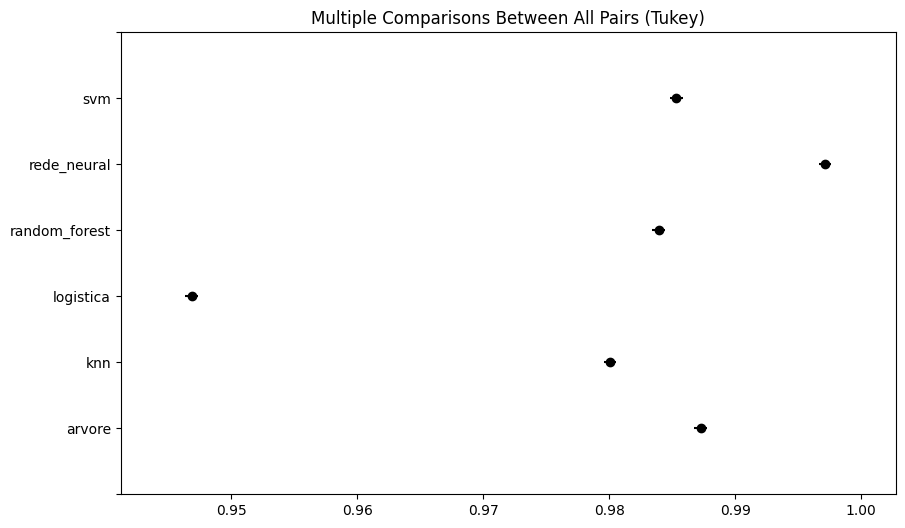

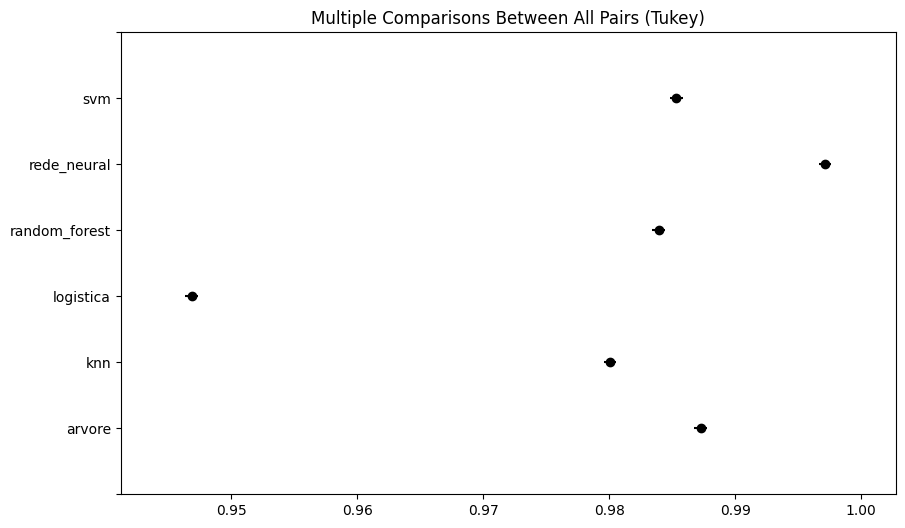

In [41]:
teste_estatistico.plot_simultaneous()

## Classificador treinado

In [42]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [43]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [44]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [45]:
classificador_svm = SVC(C=2.0, tol=0.1, kernel='rbf')
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, tol=0.1)

In [46]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizada.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizada.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizada.sav', 'wb'))

## Carregando o classificador e realizando testes

In [47]:
rede_neural = pickle.load(open('rede_neural_finalizada.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizada.sav', 'rb'))
svm = pickle.load(open('svm_finalizada.sav', 'rb'))

In [56]:
novo_registro = X_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [57]:
novo_registro = novo_registro.reshape(1, -1)


In [58]:
novo_registro.shape

(1, 3)

In [59]:
rede_neural.predict(novo_registro)

array([1])

In [60]:
arvore.predict(novo_registro)

array([1])

In [61]:
svm.predict(novo_registro)

array([1])